## Final Project Submission

Please fill out:
* Student name: Dapash Kumati
* Student pace: full time
* Scheduled project review date/time: 30/9/2025
* Instructor name: Nikita Njoroge
* Blog post URL:


## 1: Background
### The company is expanding its portfolio by entering the aviation industry, focusing on both commercial and private air travel. However, aviation carries inherent safety and financial risks, especially when it comes to aircraft accidents, reliability, and maintenance. To ensure a successful and sustainable entry into this industry, the company requires an evidence-based assessment of aircraft safety and associated risks.

## 2: Project Overview

### This project leverages historical accident data from the National Transportation Safety Board (NTSB), covering civil aviation accidents and selected incidents from 1962 to 2023. By analyzing this dataset, we aim to identify aircraft types with the lowest safety risks. The insights generated will guide business stakeholders in making informed decisions on which aircraft are most suitable for purchase and operation, minimizing risk exposure and maximizing operational reliability.

## 3: Business Understanding
### Goal: Determine which aircraft types are associated with the lowest risk for accidents/incidents.
### Objectives:
1. To assess the distribution and severity of aircraft accidents across different aircraft models and manufacturers.
2. To analyze the relationship between accident characteristics (fatalities, damage level, risk category) and the likelihood of aircraft being involved in fatal incidents.
3. To identify trends in aviation accident frequency and severity over time and across geographical locations.

## 4: Data Understanding

### a).Set up the environment and import libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Display settings
pd.set_option("display.max_columns", None)

### b).Load Data

In [2]:
# Load dataset
df = pd.read_csv("data/Aviation_Data.csv", low_memory= False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### c). Initial Data Exploration

In [3]:
# Shape
df.shape

(90348, 31)

In [4]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [5]:
# Summary statistics for all columns
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Event.Id,88889,87951,20001214X45071,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investigation.Type,90348,71,Accident,85015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Accident.Number,88889,88863,ERA22FA338,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Event.Date,88889,14782,1982-05-16,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,88837,27758,"ANCHORAGE, AK",434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,88663,219,United States,82248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,34382,25589,332739N,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Longitude,34373,27154,0112457W,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Airport.Code,50249,10375,NONE,1488,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Airport.Name,52790,24871,Private,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Summary statistics for numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## 5: Data Cleaning

### A). Checking missing values

In [8]:
df.isna().sum().sort_values(ascending=False)

Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40099
Airport.Name              37558
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8536
Report.Status              7840
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2776
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type            0
dtype: i

In [9]:
# To know the percentage of the missing values
df.isna().mean()*100

Event.Id                   1.614867
Investigation.Type         0.000000
Accident.Number            1.614867
Event.Date                 1.614867
Location                   1.672422
Country                    1.865011
Latitude                  61.944924
Longitude                 61.954886
Airport.Code              44.382831
Airport.Name              41.570372
Injury.Severity            2.721698
Aircraft.damage            5.150086
Aircraft.Category         64.263736
Registration.Number        3.072564
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.447913
FAR.Description           64.555939
Schedule                  86.073848
Purpose.of.flight          8.468367
Air.carrier               81.573471
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6

### B). Handling missing values

In [10]:
# Drop columns with too many missing values (>60% missing)
threshold = 0.6 * len(df)
df = df.dropna(axis=1, thresh=threshold)

In [11]:
# Fill missing categorical values with "Unknown"
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].fillna("Unknown")

In [12]:
for col in df.select_dtypes(include=["float64", "int64"]).columns:
    df[col] = df[col].fillna(df[col].median())

In [13]:
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [14]:
df.shape

(90348, 23)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                90348 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         90348 non-null  object 
 3   Event.Date              90348 non-null  object 
 4   Location                90348 non-null  object 
 5   Country                 90348 non-null  object 
 6   Injury.Severity         90348 non-null  object 
 7   Aircraft.damage         90348 non-null  object 
 8   Registration.Number     90348 non-null  object 
 9   Make                    90348 non-null  object 
 10  Model                   90348 non-null  object 
 11  Amateur.Built           90348 non-null  object 
 12  Number.of.Engines       90348 non-null  float64
 13  Engine.Type             90348 non-null  object 
 14  Purpose.of.flight       90348 non-null

### C). Checking and dropping duplicates

In [16]:
df.duplicated().sum()

1390

In [17]:
df = df.drop_duplicates()
print("After dropping full duplicates:", df.shape)

After dropping full duplicates: (88958, 23)


In [18]:
df.duplicated().sum()

0

### D). Outliers
### a) Focus on numerical columns


In [19]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
print("Numeric columns:", numeric_cols)

Numeric columns: Index(['Number.of.Engines', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured'],
      dtype='object')


 ### b) Visualization to show outliers
 ### Boxplots for Outlier Visualization - are the best way to see outliers (they appear as dots beyond the whiskers).

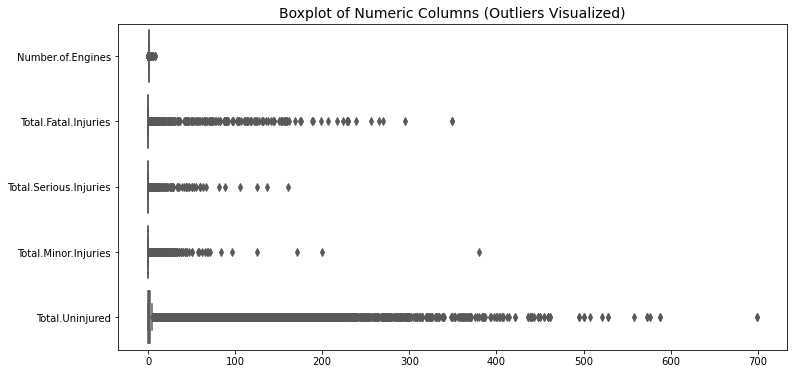

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols], orient="h", palette="Set2")
plt.title("Boxplot of Numeric Columns (Outliers Visualized)", fontsize=14)
plt.show()

### c) Histograms for Distribution
### - They show how values are spread and highlight long tails caused by outliers.

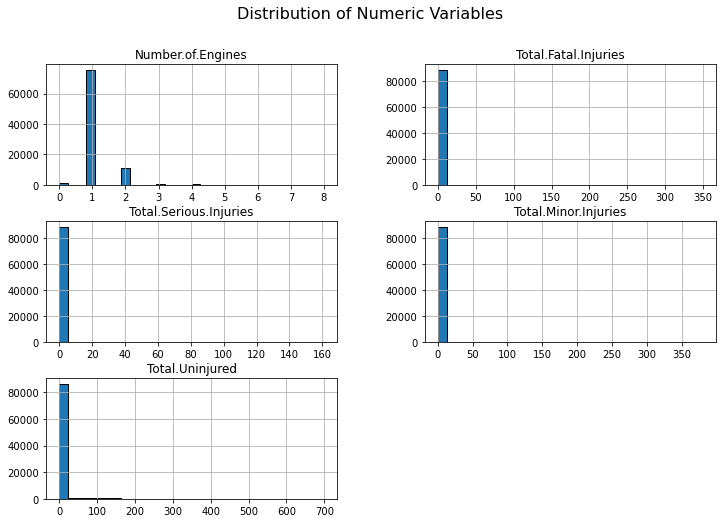

In [21]:
df[numeric_cols].hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numeric Variables", fontsize=16)
plt.show()

## NB: I didn't remove outliers on my decision because they might be real accidents so if i drop them they might affect my analysis leading to biasness.

## 6: Data Visualization per Objective
###  Objective 1: Distribution & Severity by Model/Manufacturer


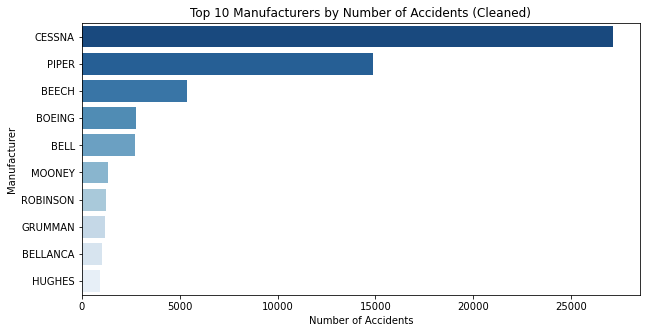

In [22]:
# Clean the manufacturer names
df['Make_Cleaned'] = df['Make'].str.upper().str.strip()

# Count accidents by manufacturer
manufacturer_counts = df['Make_Cleaned'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=manufacturer_counts.values, y=manufacturer_counts.index, palette="Blues_r")
plt.title("Top 10 Manufacturers by Number of Accidents (Cleaned)")
plt.xlabel("Number of Accidents")
plt.ylabel("Manufacturer")
plt.show()



### Interpretation: The analysis of accident frequency by manufacturer indicates that a small number of aircraft producers account for the majority of reported accidents, with manufacturers like Cessna and Piper appearing most frequently in the dataset.

### Adding severity columns that will help me to achieve my objective

In [23]:
def classify_severity(row):
    if row['Total.Fatal.Injuries'] > 0:
        return "Fatal"
    elif row['Total.Serious.Injuries'] > 0:
        return "Serious"
    elif row['Total.Minor.Injuries'] > 0:
        return "Minor"
    else:
        return "No Injury"

df["Injury_Severity"] = df.apply(classify_severity, axis=1)

### Then group by it:

In [24]:
severity_by_model = (
    df.groupby(['Make', 'Model'])['Injury_Severity']
    .value_counts()
    .unstack()
    .fillna(0)
)
severity_by_model.head()

,Injury_Severity,Fatal,Minor,No Injury,Serious
Make,Model,,,,
107.5 Flying Corporation,One Design DR 107,1.0,0.0,0.0,0.0
1200,G103,0.0,0.0,0.0,1.0
177MF LLC,PITTS MODEL 12,0.0,0.0,0.0,1.0
1977 Colfer-chan,STEEN SKYBOLT,0.0,1.0,0.0,0.0
1st Ftr Gp,FOCKE-WULF 190,1.0,0.0,0.0,0.0


### Objective 2: Accident Characteristics & Fatal Incidents

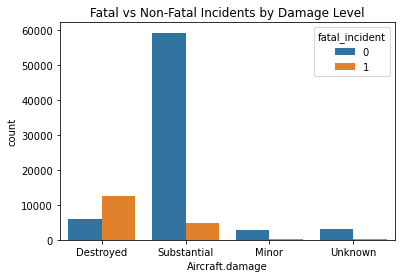

Make
107.5 Flying Corporation    1.0
Colliander                  1.0
Parrigin                    1.0
Coen                        1.0
Parkman                     1.0
Parker Warren               1.0
Parachute Icarus            1.0
Papa 51 Ltd., Co.           1.0
Pank                        1.0
Panaplane                   1.0
Name: fatal_incident, dtype: float64


In [25]:
# Create a "fatal" indicator
df['fatal_incident'] = np.where(df['Total.Fatal.Injuries'] > 0, 1, 0)

# Compare fatal vs non-fatal by damage level
sns.countplot(data=df, x='Aircraft.damage', hue='fatal_incident')
plt.title("Fatal vs Non-Fatal Incidents by Damage Level")
plt.show()

# Risk ratio by manufacturer
risk = df.groupby('Make')['fatal_incident'].mean().sort_values(ascending=False).head(10)
print(risk)

### Intepretation: Severe damage (e.g., “Destroyed”) is strongly associated with fatal accidents while Minor/substantial damage tends to have mostly non-fatal outcomes. This indicates that aircraft damage level is a strong predictor of survivability.

### Objective 3: Trends Over Time & Geography


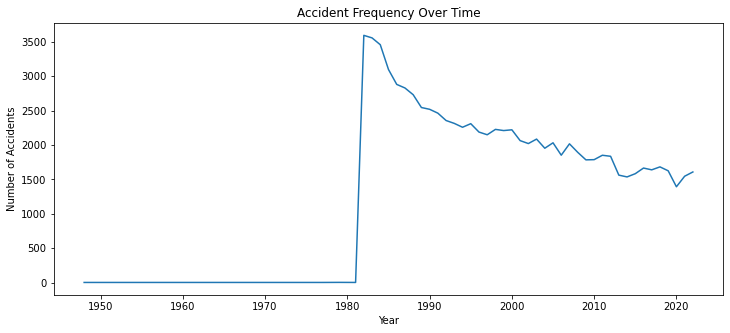

In [26]:
# Convert date
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors="coerce")

# Accidents per year
df['year'] = df['Event.Date'].dt.year
accidents_per_year = df.groupby('year').size()

plt.figure(figsize=(12,5))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values)
plt.title("Accident Frequency Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()

# Geographical trends (using Plotly for interactivity)
accidents_by_country = df["Country"].value_counts().reset_index()
accidents_by_country.columns = ["Country", "Accident_Count"]

fig = px.choropleth(
    accidents_by_country,
    locations="Country",
    locationmode="country names",
    color="Accident_Count",
    title="Aviation Accident Frequency by Country"
)
fig.show()

### Interpretaion : The line chart provides insights into whether aviation safety has improved or worsened over time, Most often, you’ll find a decline in accidents in recent decades due to better aircraft engineering, pilot training, and regulations.
### Also by countries, Darker-colored countries = higher number of accidents while Lighter-colored countries = lower accident counts. Usually, the United States dominates accident counts in such datasets (especially NTSB data) because of the large number of aircraft and reporting coverage but Some countries may appear low not because they’re safer, but because they have fewer flights or less complete reporting.

## 7: Save the Cleaned Data and export it  to tableau

In [27]:
# Standardize manufacturer names
df['Make'] = df['Make'].str.upper().str.strip()

In [28]:
df.to_csv("Cleaned_AviationData.csv", index=False)

## 8: Conclusion
### The study shows that accident distribution is concentrated among major manufacturers such as Cessna and Piper, largely reflecting their dominance in the market, but the likelihood of fatal outcomes differs significantly across aircraft types and models. Accident severity is closely tied to the extent of aircraft damage, with fatal incidents more common in cases of substantial or destroyed aircraft. Over time, accident frequencies demonstrate a general downward trend, reflecting improvements in aviation safety, though some spikes persist due to isolated events or reporting differences. Geographically, the United States records the highest number of accidents, consistent with its high flight volumes and strong reporting, while lower counts in other regions may reflect underreporting rather than inherently safer skies.

## 9: Recommendations
### Based on the findings, the company should prioritize aircraft with lower fatality ratios rather than focusing solely on accident counts, and place emphasis on manufacturer-specific safety performance when making purchase decisions. Strengthening pilot training, routine maintenance, and safety audits is critical to reducing risk exposure, particularly for models with higher fatal accident proportions. Additionally, management should adopt a data-driven risk framework that integrates historical safety records, geographical trends, and operational factors before expanding into aviation. Finally, ongoing monitoring and alignment with global safety standards will ensure that investment choices are both safe and sustainable in the long term.